# Implementing a Neuronal Network

In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from neuronal_network import NeuronalNetwork 

## Dataset

In [2]:
def make_spiral(n_samples):
    # class 0
    t = 0.75 * np.pi * \
        (1 + 3 * np.random.rand(1, n_samples))
    
    x1 = t * np.cos(t)
    x2 = t * np.sin(t)
    
    y = np.zeros_like(t)
    
    # class 1
    t = 0.75 * np.pi * \
        (1 + 3 * np.random.rand(1, n_samples))
    
    x1 = np.hstack([-x1, t * np.cos(t)])
    x2 = np.hstack([-x2, t * np.sin(t)])
    
    y = np.hstack([y, np.ones_like(t)])

    # concatenate data points for both classes
    X = np.concatenate((x1, x2))
    # add some noise
    X += 0.50 * np.random.randn(2, 2 * n_samples)
    
    return X.T, y[0]

# generate the dataset
X, y = make_spiral(100)

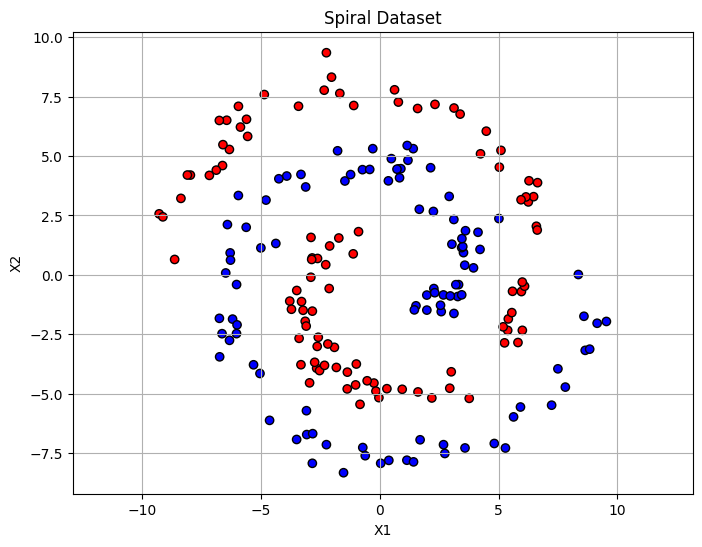

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Spiral Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.axis('equal')
plt.show()

In [4]:
# Netzwerk initialisiern
input_dimension = 2
hidden_dimension = 16
output_dimension = 1
learnin_rate = 0.01

nn = NeuronalNetwork(
    input_dimension,
    hidden_dimension,
    output_dimension,
    learnin_rate
)

In [5]:
# Training
nn.train(X, y, epochs=75000)

# Auswertung
print("Accuracy:", nn.accuracy(X, y))

Accuracy: 0.9974900, Loss: 0.0085


In [6]:
def plot_decision_boundary(model, X, y, steps=300, cmap='bwr'):
    # Define grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate grid points
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, steps),
        np.linspace(y_min, y_max, steps)
    )
    
    # Predict over grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)
    
    # Plot contour and points
    plt.contourf(xx, yy, preds, alpha=0.4, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=cmap, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

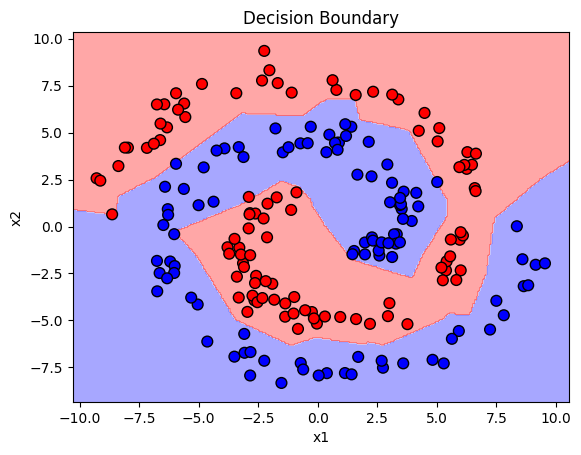

In [7]:
plot_decision_boundary(nn, X, y)

In [8]:
nn.info()

Model Parameters:
------------------------------------------------------------------------------------------------------------------------
Input Weights (W1)             Bias (b1)                      Output Weights (W2.T)          Bias (b2)                     
------------------------------------------------------------------------------------------------------------------------
-0.0313 -0.0663                -0.2272                        -0.2331                         0.7395                       
-0.1781  0.0311                 1.0419                        -1.0497                                                      
-1.6170 -1.3008                 2.8563                         3.5314                                                      
-0.6815  0.0972                 4.0545                        -4.1105                                                      
 0.0842  1.1227                -1.1147                         1.5828                                                   